In [64]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline


In [65]:
playerdata_1718season = '.\playerstatsbygame_20172018_regularseason.csv'
playerseason_data = '.\Seasons_Stats.csv'
salarydata = './nba_salaries_1990_to_2018.csv'
rpm_data = './RPM_data.xlsx'

In [66]:
playerstats_1718 = pd.read_csv(playerdata_1718season)
playerseasondata = pd.read_csv(playerseason_data)
salarydata = pd.read_csv(salarydata)
rpmdata = pd.read_excel(rpm_data, sheet_name='Agg')

In [67]:
print(salarydata.columns)
print(playerseasondata.columns)
salarydata.head()

Index(['player', 'salary', 'season_end', 'season_start', 'team', 'team_name'], dtype='object')
Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')


,player,salary,season_end,season_start,team,team_name
0,A.C. Green,4851000,1997,1996,DAL,Dallas Mavericks
1,A.C. Green,5125088,1999,1998,DAL,Dallas Mavericks
2,A.C. Green,1750000,1991,1990,LAL,Los Angeles Lakers
3,A.C. Green,1750000,1992,1991,LAL,Los Angeles Lakers
4,A.C. Green,1750000,1993,1992,LAL,Los Angeles Lakers


In [68]:
# combine salary data (1990 - 2017 season end) with stats for one giant player table
# Note, each year is the season end year

stats = playerseasondata.loc[playerseasondata.loc[:, 'Year'] >= 1990, :]
salary = salarydata.loc[salarydata.loc[:, 'season_end'] <=2017, :]
data = stats.merge(salary, left_on=['Player', 'Year'], right_on = ['player', 'season_end'], how='outer')

#get rid of columns I don't want/duplicates and rename existing for clarity

data.drop(['Unnamed: 0','3PAr', 'blank2',
 'blanl', 'BPM', 'DBPM', 'eFG%', 'FTr', 'OBPM', 'team_name', 'VORP', 'WS/48'], axis=1, inplace=True)

data.rename(columns={ '2PA':'2PAttempt', '2P':'2PMade', '2P%':'2Pt%', '3P%':'3Pt%',
 '3PA':'3PtAttempt', '3P':'3PtMade', 'Age':'Age_seasonEnd', 'AST%':'Assist%',
 'AST':'Assists', 'BLK%':'Block%', 'BLK':'Blocks', 'DRB%':'Drebound%',
 'DRB':'Drebounds', 'DWS': 'Dwinshares', 'FG%':'FG%', 'FGA':'Fgattempt', 'FG':'Fgmade',
 'FT%':'FT%', 'FTA':'FTAttempt', 'FT':'FTMade', 'G':'Games',
 'GS':'GamesStarted', 'MP':'MinPlayed', 'ORB':'Offrb', 'ORB%':'OffRb%',
 'OWS': 'OffWinShares', 'PER':'PER', 'PF':'PersonalFouls', 'Player':'Player', 'player':'player',
 'Pos':'Position', 'PTS':'Pts', 'salary':'Salary', 'season_end':'Season_End',
 'season_start':'Season_Start', 'STL%':'Steal%', 'STL':'Steals',
 'team':'Team', 'Tm': 'Stats_Team', 'TRB%':'TotalRbnd%', 'TRB':'TotalRbnds',
 'TS%':'TS%', 'TOV':'Turnover', 'TOV%':'Turnover%','USG%':'Usg%', 'WS':'WinShares', 'Year': 'Stats_SeasonEnd'}, inplace=True)

In [69]:
data.groupby('Team').count()

team_list = data['Team'].unique()
team_list

team_fullnames = {'LAL': 'LA Lakers', 'PHO': 'Phoenix Suns' , 'DAL':'Dallas Mavericks' , 
                  'MIA': 'Miami Heat', 'CLE': 'Cleveland Cavaliers', 'WAS': 'Washington Wizards',
                  'CHI': 'Chicago Bulls', 'GSW': 'Golden State Warriors', 'IND': 'Indiana Pacers',
                  'BOS': 'Boston Celtics', 'HOU': 'Houston Rockets', 'SAC': 'Sacramento Kings',
                  'ORL': 'Orlando Magic', 'NOH': 'New Orleans Pelicans/Hornets', 'TOR': 'Toronto Raptors',
                  'CHA': 'Charlotte Hornets', 'POR': 'Portland Trailblazers', 'DET': 'Detroit Pistons',
                  'PHI': 'Philadelphia 76ers', 'MIL': 'Milwaukee Bucks', 'DEN': 'Denver Nuggets', 
                  'OKC': 'OKC Thunder', 'NJN': 'Brooklyn Nets', 'LAC': 'Los Angeles Clippers', 'ATL': 'Atlanta Hawks', 
                  'MEM': 'Memphis Grizzlies', 'UTA': 'Utah Jazz','MIN': 'Minnesota Timberwolves', 'NYK': 'New York Knicks',
                  'SAS': 'San Antonio Spurs'}


Basic EDA

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot)
- Scatterplot of each column with salary

In [70]:
print("Shape:", data.shape, '\n')
print("Types:", data.dtypes, '\n')
print("Null counts:", data.isnull().sum(), '\n')

Shape: (16531, 47) 

Types: Stats_SeasonEnd    float64
Player              object
Position            object
Age_seasonEnd      float64
Stats_Team          object
Games              float64
GamesStarted       float64
MinPlayed          float64
PER                float64
TS%                float64
OffRb%             float64
Drebound%          float64
TotalRbnd%         float64
Assist%            float64
Steal%             float64
Block%             float64
Turnover%          float64
Usg%               float64
OffWinShares       float64
Dwinshares         float64
WinShares          float64
Fgmade             float64
Fgattempt          float64
FG%                float64
3PtMade            float64
3PtAttempt         float64
3Pt%               float64
2PMade             float64
2PAttempt          float64
2Pt%               float64
FTMade             float64
FTAttempt          float64
FT%                float64
Offrb              float64
Drebounds          float64
TotalRbnds         float64


In [71]:
data.describe()

,Stats_SeasonEnd,Age_seasonEnd,Games,GamesStarted,MinPlayed,PER,TS%,OffRb%,Drebound%,TotalRbnd%,...,TotalRbnds,Assists,Steals,Blocks,Turnover,PersonalFouls,Pts,Salary,Season_End,Season_Start
count,15750.000000,15750.000000,15750.000000,15750.000000,15750.000000,15744.000000,15671.000000,15744.000000,15744.000000,15744.000000,...,15750.000000,15750.000000,15750.000000,15750.000000,15750.000000,15750.000000,15750.000000,1.399700e+04,13997.000000,13997.000000
mean,2004.457778,27.011619,47.435746,22.428952,1103.393016,12.303595,0.502114,5.974708,13.906358,9.942416,...,191.716698,101.600000,35.888698,22.482286,65.598222,99.580889,450.543683,3.198376e+06,2005.154747,2004.154747
std,8.041946,4.155334,26.700606,28.007906,914.324357,6.365421,0.098865,5.079706,6.615922,5.103128,...,195.254178,130.891916,35.819352,34.347260,62.642356,76.938522,459.835363,4.043442e+06,7.848172,7.848172
min,1990.000000,18.000000,1.000000,0.000000,0.000000,-90.600000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.706000e+03,1991.000000,1990.000000
25%,1998.000000,24.000000,23.000000,0.000000,268.000000,9.500000,0.470000,2.300000,9.200000,6.000000,...,40.000000,14.000000,7.000000,2.000000,14.000000,30.000000,79.000000,6.886790e+05,1998.000000,1997.000000
50%,2005.000000,26.000000,51.000000,7.000000,892.000000,12.600000,0.515000,4.800000,12.900000,9.000000,...,132.000000,53.000000,25.000000,10.000000,48.000000,88.500000,299.000000,1.600000e+06,2006.000000,2005.000000
75%,2011.000000,30.000000,73.000000,41.000000,1799.000000,15.500000,0.551000,8.900000,18.100000,13.400000,...,279.000000,137.750000,54.000000,27.000000,100.000000,157.000000,692.750000,4.000000e+06,2012.000000,2011.000000
max,2017.000000,44.000000,85.000000,83.000000,3533.000000,129.100000,1.136000,100.000000,100.000000,100.000000,...,1530.000000,1164.000000,246.000000,376.000000,464.000000,371.000000,2832.000000,3.314000e+07,2017.000000,2016.000000


In [72]:
for col in data.columns:
    print(col, data.loc[:, col].nunique())

Stats_SeasonEnd 28
Player 2290
Position 16
Age_seasonEnd 27
Stats_Team 39
Games 85
GamesStarted 84
MinPlayed 3140
PER 512
TS% 570
OffRb% 291
Drebound% 392
TotalRbnd% 304
Assist% 507
Steal% 107
Block% 127
Turnover% 388
Usg% 394
OffWinShares 167
Dwinshares 87
WinShares 197
Fgmade 799
Fgattempt 1515
FG% 468
3PtMade 240
3PtAttempt 552
3Pt% 398
2PMade 738
2PAttempt 1333
2Pt% 458
FTMade 568
FTAttempt 696
FT% 626
Offrb 350
Drebounds 700
TotalRbnds 939
Assists 711
Steals 217
Blocks 256
Turnover 322
PersonalFouls 331
Pts 1844
player 2161
Salary 5222
Season_End 27
Season_Start 27
Team 30


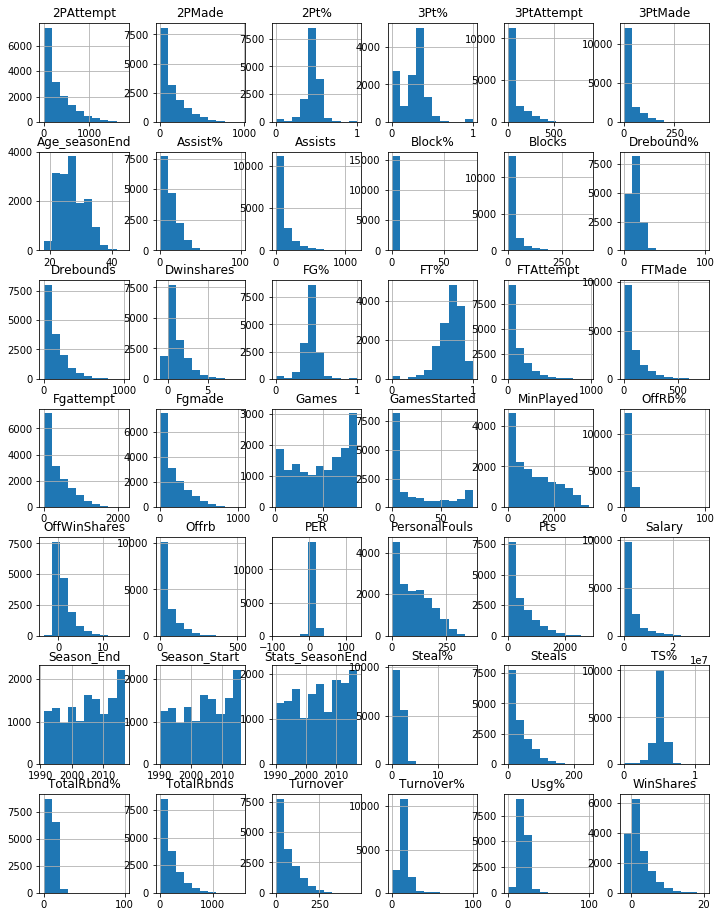

In [73]:
data.hist(figsize=(12,16));

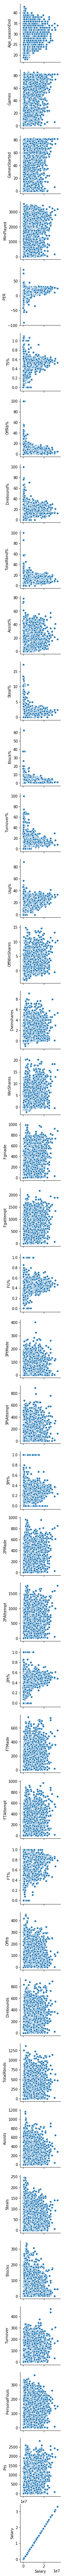

In [74]:
list(data.columns)

stats_features = [ 'Age_seasonEnd', 'Games', 'GamesStarted',
 'MinPlayed', 'PER', 'TS%', 'OffRb%', 'Drebound%', 'TotalRbnd%', 'Assist%',
 'Steal%', 'Block%', 'Turnover%', 'Usg%', 'OffWinShares', 'Dwinshares', 'WinShares',
 'Fgmade', 'Fgattempt', 'FG%', '3PtMade', '3PtAttempt', '3Pt%', '2PMade', '2PAttempt',
 '2Pt%', 'FTMade', 'FTAttempt', 'FT%', 'Offrb', 'Drebounds', 'TotalRbnds', 'Assists',
 'Steals', 'Blocks', 'Turnover', 'PersonalFouls', 'Pts', 'Salary']

g=sns.pairplot(data,
              y_vars = stats_features ,
              x_vars = 'Salary');

Cleaning it up -- checking for missing values and replace as needed

In [75]:
data.isnull().sum()
#Lots of missing values.

Stats_SeasonEnd     781
Player              781
Position            781
Age_seasonEnd       781
Stats_Team          781
Games               781
GamesStarted        781
MinPlayed           781
PER                 787
TS%                 860
OffRb%              787
Drebound%           787
TotalRbnd%          787
Assist%             787
Steal%              787
Block%              787
Turnover%           844
Usg%                787
OffWinShares        781
Dwinshares          781
WinShares           781
Fgmade              781
Fgattempt           781
FG%                 869
3PtMade             781
3PtAttempt          781
3Pt%               3584
2PMade              781
2PAttempt           781
2Pt%                904
FTMade              781
FTAttempt           781
FT%                1508
Offrb               781
Drebounds           781
TotalRbnds          781
Assists             781
Steals              781
Blocks              781
Turnover            781
PersonalFouls       781
Pts             

In [76]:
#For NaN stats values, a '0' is an acceptable number, so will fill in missing stats with 0.

fillwithzero = ['Games',
 'GamesStarted',
 'MinPlayed',
 'PER',
 'TS%',
 'OffRb%',
 'Drebound%',
 'TotalRbnd%',
 'Assist%',
 'Steal%',
 'Block%',
 'Turnover%',
 'Usg%',
 'WinShares',
 'Fgmade',
 'Fgattempt',
 'FG%',
 '3PtMade',
 '3PtAttempt',
 '3Pt%',
 '2PMade',
 '2PAttempt',
 '2Pt%',
 'FTMade',
 'FTAttempt',
 'FT%',
 'Offrb',
 'Drebounds',
 'TotalRbnds',
 'Assists',
 'Steals',
 'Blocks',
 'Turnover',
 'PersonalFouls',
 'Pts']

data[fillwithzero] = data[fillwithzero].fillna(value=0)

# Count # of salaries per year that are non-null:
data.loc[:, ['Stats_SeasonEnd', 'Salary', 'Player']].groupby('Stats_SeasonEnd').count()

,Salary,Player
Stats_SeasonEnd,,
1990.0,0,459
1991.0,389,442
1992.0,396,461
1993.0,391,451
1994.0,437,487
1995.0,351,466
1996.0,470,549
1997.0,484,578
1998.0,444,552


In [77]:
# Look at players with missing salary data & fill in with the average salary (if available)
salary_count = data.loc[:, ['Player', 'Stats_SeasonEnd', 'Salary']].groupby('Player').apply(lambda x: x.count())

salary_count['missing'] = salary_count['Player'] - salary_count['Salary']

In [78]:
salary_count.sort_values(by='missing', ascending=False)

playeravgsal = data.loc[:, ['Player', 'Salary']].groupby('Player').mean()
playeravgsal = playeravgsal.to_dict()
playeravgsal = playeravgsal['Salary']

In [79]:
#data.loc[data.loc[:, 'Player'] == 'A.C. Green', 'Salary'].fillna(playeravgsal.loc['A.C. Green', 'Salary'])

data.Salary = data.Salary.fillna(data.Player.map(playeravgsal))

salaryplayercount = data.loc[:, ['Stats_SeasonEnd', 'Salary', 'Player']].groupby('Stats_SeasonEnd').count()
salaryplayercount['ratio'] = salaryplayercount['Salary'] / salaryplayercount['Player']
salaryplayercount
#Majority of rows now have a salary attached.

,Salary,Player,ratio
Stats_SeasonEnd,,,
1990.0,348,459,0.758170
1991.0,411,442,0.929864
1992.0,447,461,0.969631
1993.0,440,451,0.975610
1994.0,468,487,0.960986
1995.0,451,466,0.967811
1996.0,533,549,0.970856
1997.0,557,578,0.963668
1998.0,546,552,0.989130


Team Salary Analysis

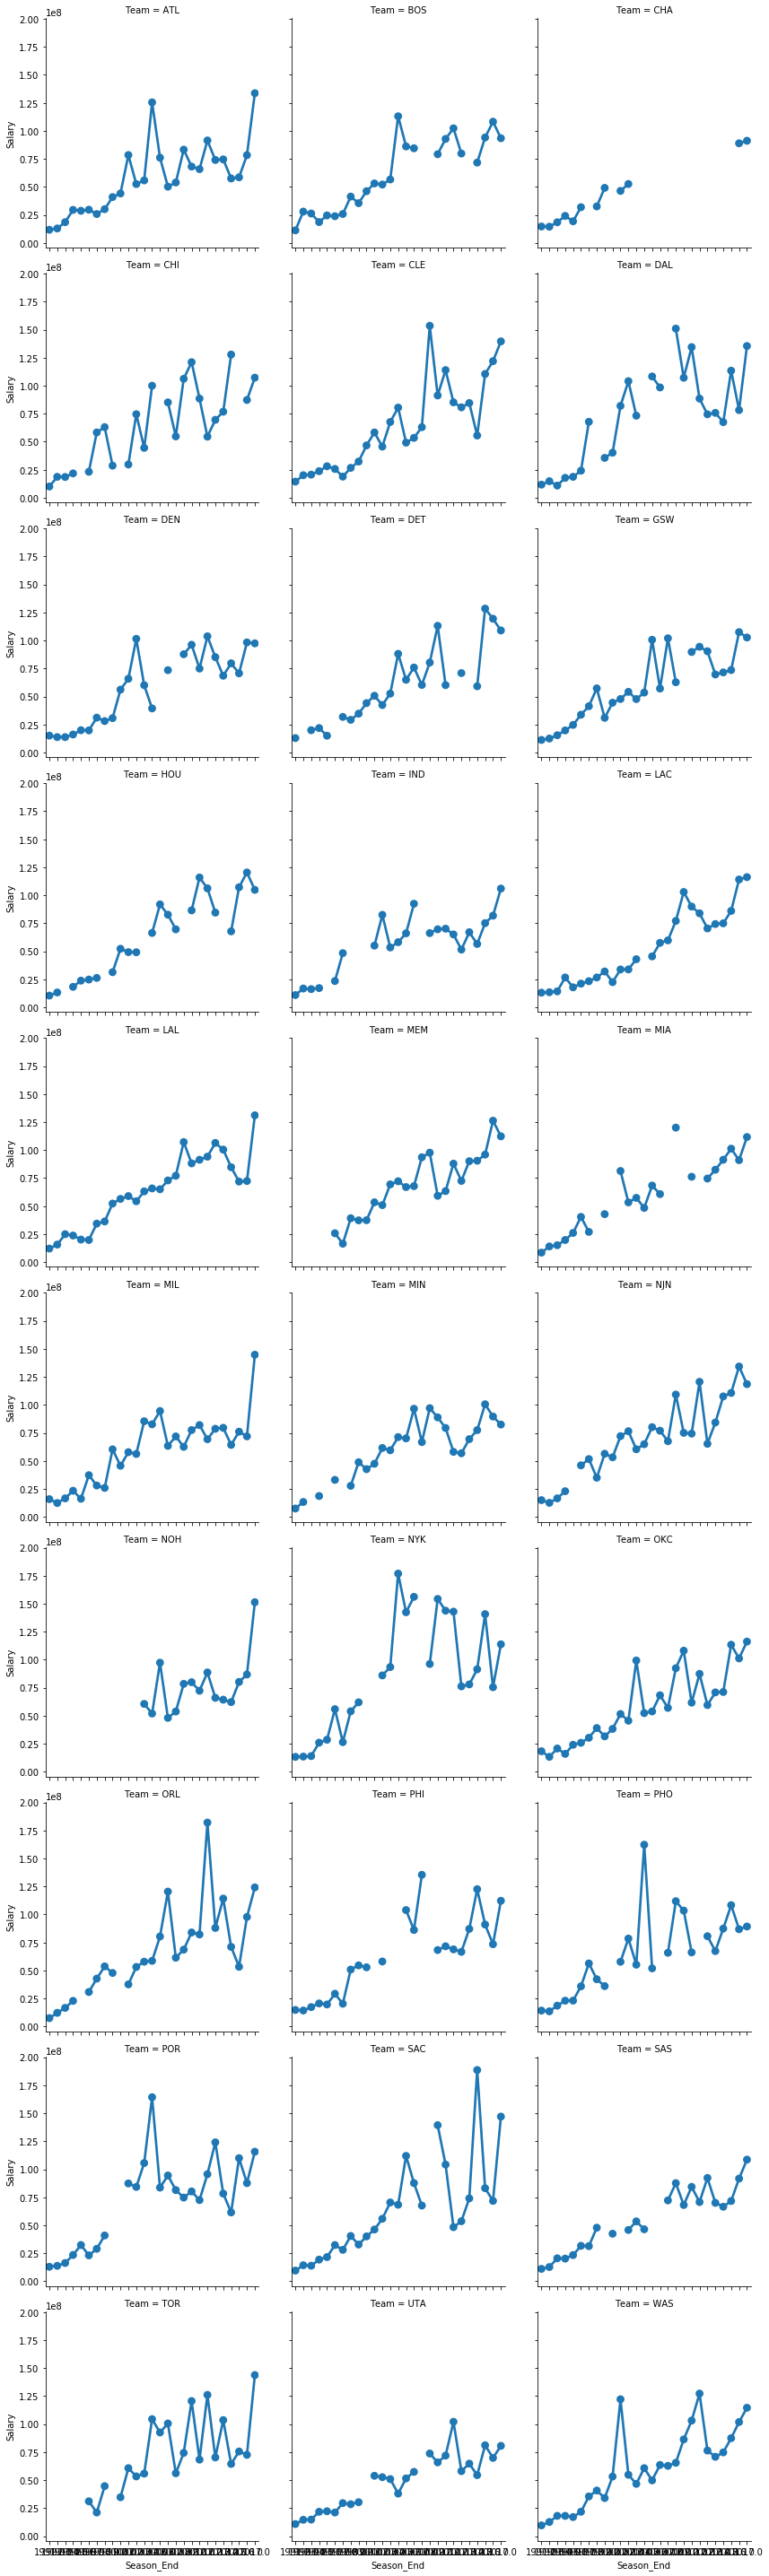

In [94]:
salary_by_year = data.loc[:, ['Team', 'Season_End', 'Salary', 'WinShares']].groupby(['Team', 'Season_End']).sum(axis=1)
salary_by_year.reset_index(inplace=True)

sns.factorplot(x='Season_End', y='Salary', col='Team', col_wrap=3, data=salary_by_year);

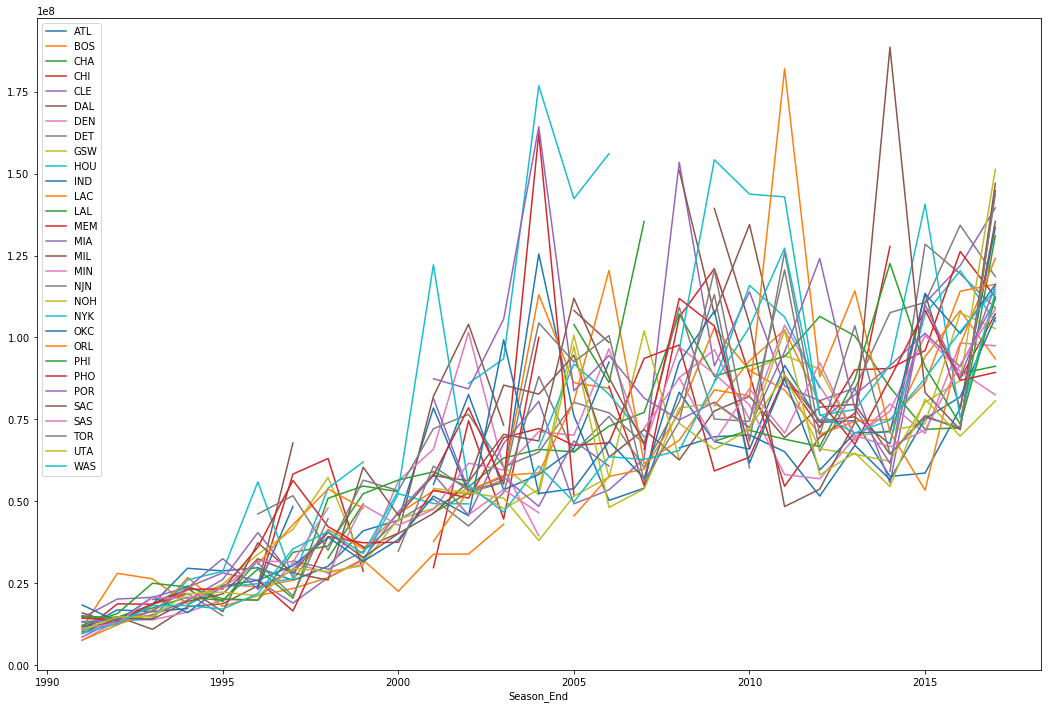

In [97]:
salary_by_year_pivoted = salary_by_year.pivot(index='Season_End', columns = 'Team', values = 'Salary')
#salary_by_year_pivoted
fig, ax = plt.subplots(figsize = (18,12))
salary_by_year_pivoted.plot(ax=ax)
ax.legend();

Salary observations:
- Salary has increased a ton from 1990 - 2017 seasons, which aligns to the salary cap increase: 1990 salary cap was ~11MM
- 2017 season cap was almost $100MM
- Charlotte has a huge gap in the middle because the team moved to New Orleans for a bit

In [82]:
#Add a column for that team's total salary for the year so can look at player sal as % of team


#data['Season_Team'] = data['Stats_SeasonEnd'].map(str) + data['Stats_Team']
#salary_by_year['Season_Team'] = salary_by_year['Season_End'].map(str) + salary_by_year['Team']

#data = data.merge(salary_by_year, on='Season_Team', how = 'left')

#data.columns

#data.drop(['Team_y', 'Season_End_y'], axis=1)

#data.drop(['Team_y', 'Season_End_y'], axis=1)

# Next Steps

- Start to determine key features for comparing salary versus player impact
- Note, probably going to use win shares instead of the real plus/minus, as I could find a pre-scraped dataset that included that rather than having to scrape through all of ESPN's pages (which I started to do in the 'get data' notebook)
- Add a column to the dataframe that is the player's salary as a % of the team's salary for that year

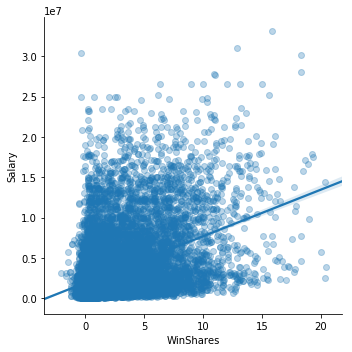

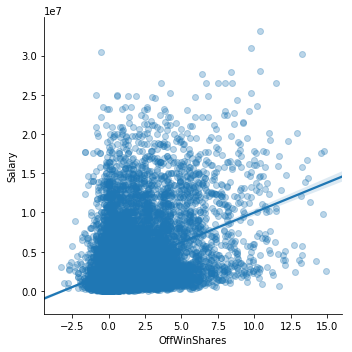

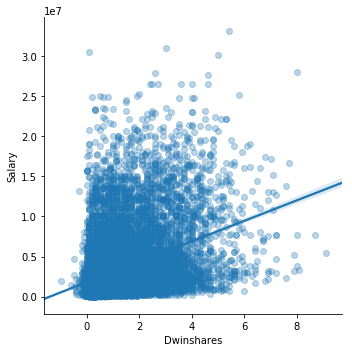

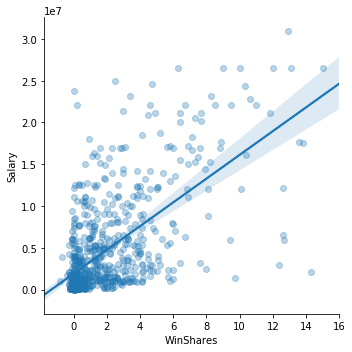

In [104]:
#Salary vs WinShares

morethan70minperseason = data.loc[data.loc[:, 'MinPlayed'] >= 70, :]

sns.lmplot(data=morethan70minperseason, x='WinShares', y='Salary', scatter_kws={'alpha':0.3})

sns.lmplot(data=morethan70minperseason, x = 'OffWinShares', y='Salary', scatter_kws={'alpha':0.3})

sns.lmplot(data=morethan70minperseason, x = 'Dwinshares', y='Salary', scatter_kws={'alpha':0.3})

sns.lmplot(data=data.loc[data.loc[:, 'Season_End'] == 2017, :], x='WinShares', y='Salary', scatter_kws={'alpha':0.3})

In [108]:
print('Salary vs Win Share correlation:', data.loc[:, 'Salary'].corr(data.loc[:, 'WinShares']))
print('Salary vs Offensive Win Share correlation:', data.loc[:, 'Salary'].corr(data.loc[:, 'OffWinShares']))
print('Salary vs Defensive Win Share correlation:', data.loc[:, 'Salary'].corr(data.loc[:, 'Dwinshares']))

Salary vs Win Share correlation: 0.4422694976337087
Salary vs Offensive Win Share correlation: 0.40743156011816395
Salary vs Defensive Win Share correlation: 0.4102106448158081


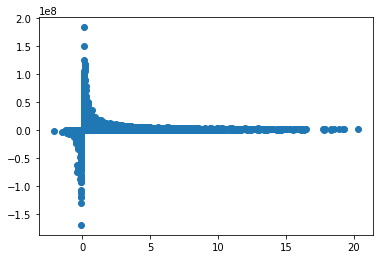

In [102]:
data['Salary_per_Winshare'] = data['Salary'] / data['WinShares']

fig, ax = plt.subplots()
plt.scatter(data=data.loc[data.loc[:, 'Season_End'] > 2000, :], x='WinShares', y='Salary_per_Winshare');

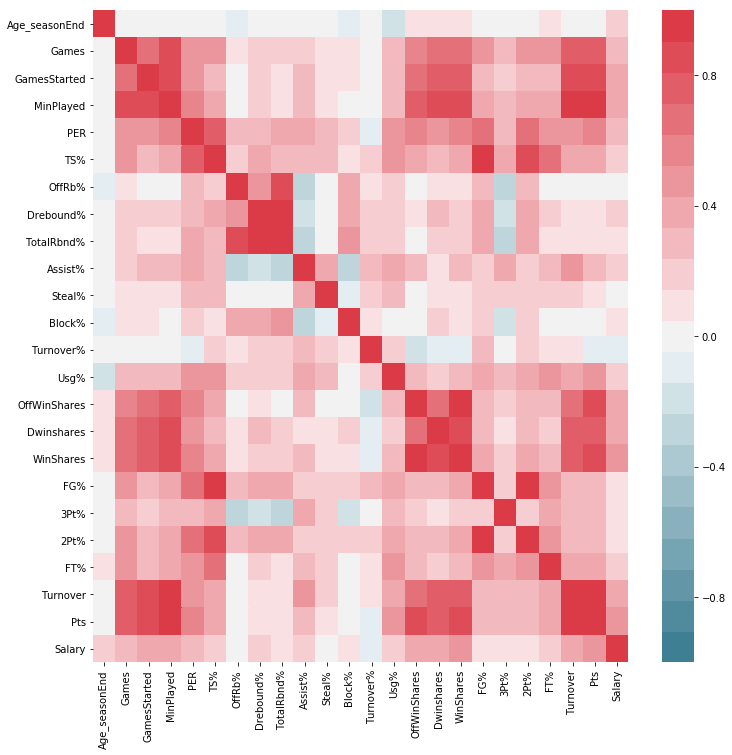

In [84]:
stats_features = [ 'Age_seasonEnd', 'Games', 'GamesStarted',
 'MinPlayed', 'PER', 'TS%', 'OffRb%', 'Drebound%', 'TotalRbnd%', 'Assist%',
 'Steal%', 'Block%', 'Turnover%', 'Usg%', 'OffWinShares', 'Dwinshares', 'WinShares', 'FG%', '3Pt%',
 '2Pt%','FT%', 'Turnover', 'Pts', 'Salary']

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data.loc[:, stats_features].corr(),
            vmin = -1,
           vmax = 1,
           cmap = sns.diverging_palette(220,10,n=21),
           ax=ax);

In [125]:
#Adding shifted win shares & salary columns to get correlations/start modeling...

data['next_season_salary'] = data.groupby(['Player'])['Salary'].shift(-1)
data['next_season_winshares'] = data.groupby(['Player'])['WinShares'].shift(-1)
data['next_season_off_winshares'] = data.groupby(['Player'])['OffWinShares'].shift(-1)
data['next_season_def_winshares'] = data.groupby(['Player'])['Dwinshares'].shift(-1)

print(data.loc[:, 'WinShares'].corr(data.loc[:, 'next_season_salary']))

data[['Player', 'Season_End', 'Salary', 'WinShares', 'next_season_salary', 'next_season_winshares']].head(20)

0.49767118617385003


,Player,Season_End,Salary,WinShares,next_season_salary,next_season_winshares
0,A.C. Green,NaN,3.642391e+06,7.7,1.750000e+06,6.1
1,A.C. Green,1991.0,1.750000e+06,6.1,1.750000e+06,8.8
2,A.C. Green,1992.0,1.750000e+06,8.8,1.750000e+06,8.6
3,A.C. Green,1993.0,1.750000e+06,8.6,1.885000e+06,9.3
4,A.C. Green,1994.0,1.885000e+06,9.3,6.472600e+06,6.7
5,A.C. Green,1995.0,6.472600e+06,6.7,6.473000e+06,4.4
6,A.C. Green,1996.0,6.473000e+06,4.4,4.851000e+06,4.8
7,A.C. Green,1997.0,4.851000e+06,4.8,4.851000e+06,0.8
8,A.C. Green,1997.0,4.851000e+06,0.8,4.851000e+06,4.0
9,A.C. Green,1997.0,4.851000e+06,4.0,3.642391e+06,5.2


C:\Users\testr\Anaconda\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


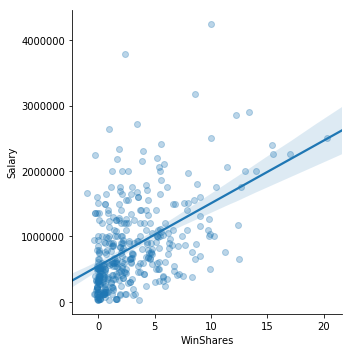

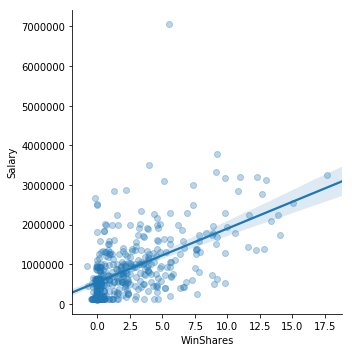

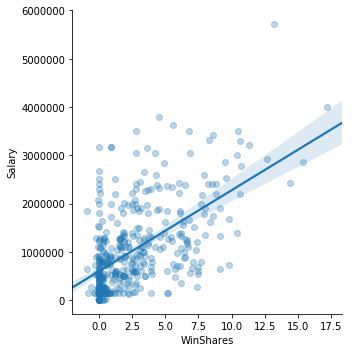

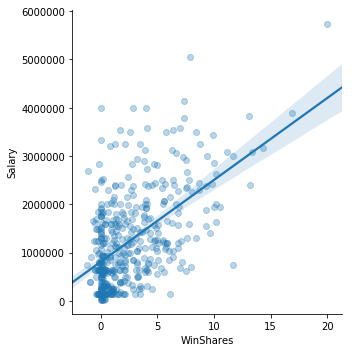

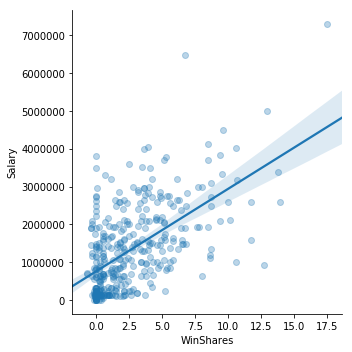

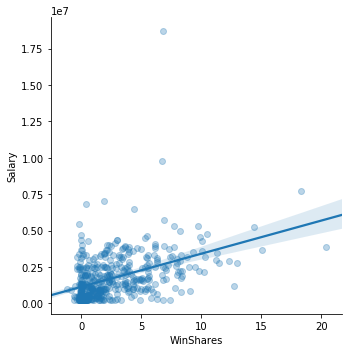

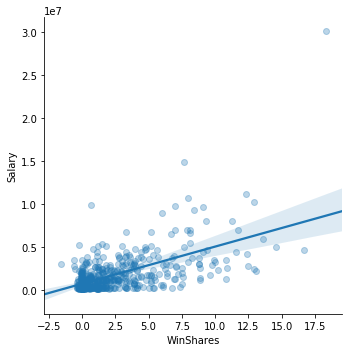

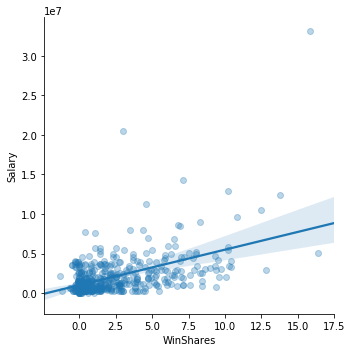

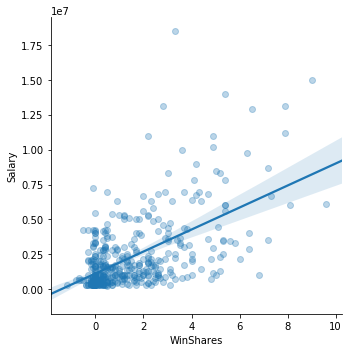

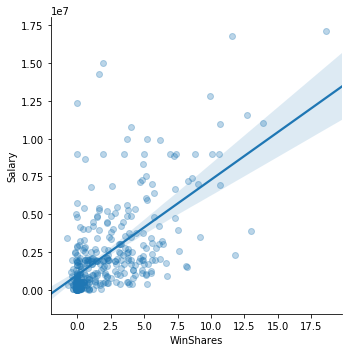

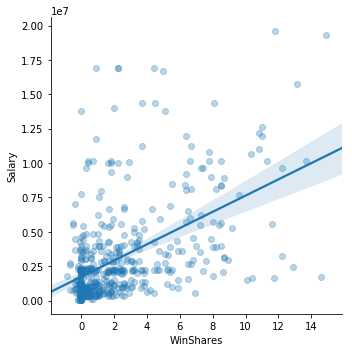

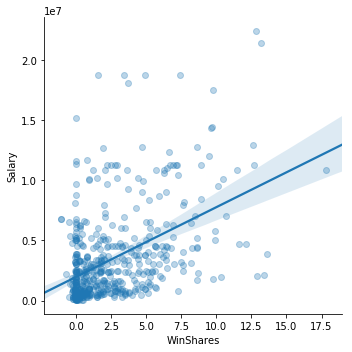

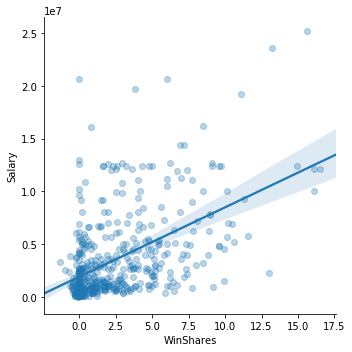

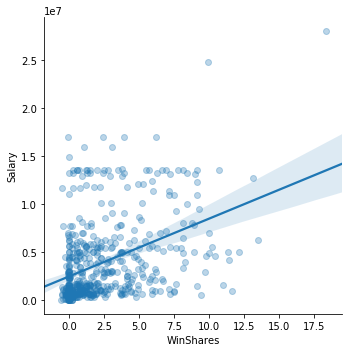

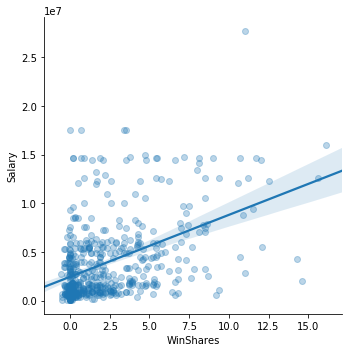

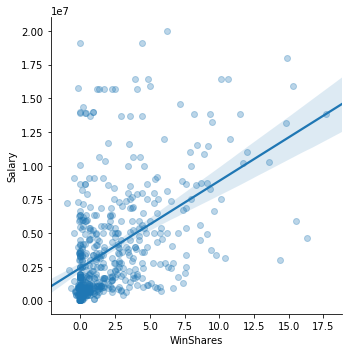

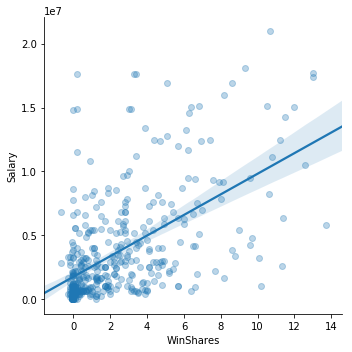

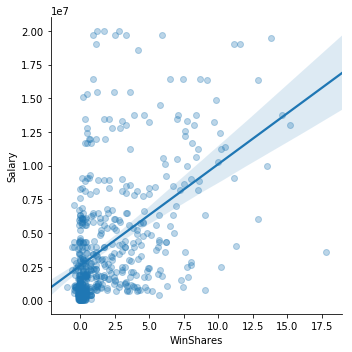

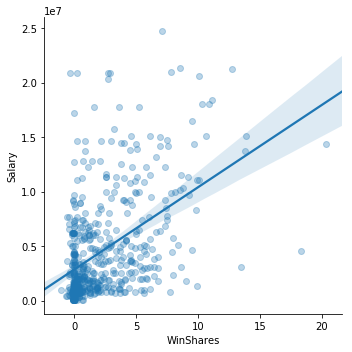

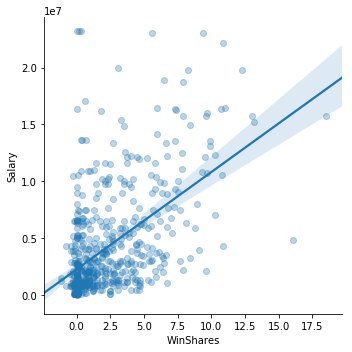

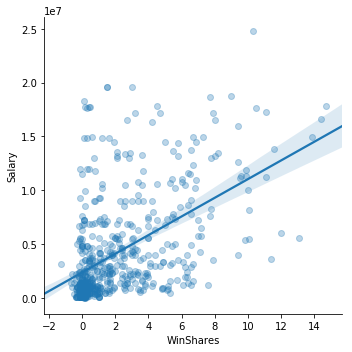

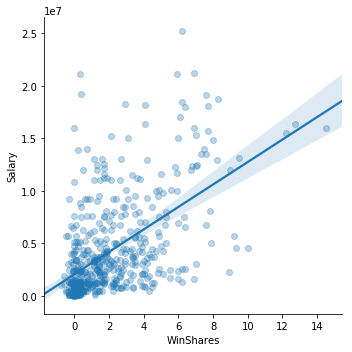

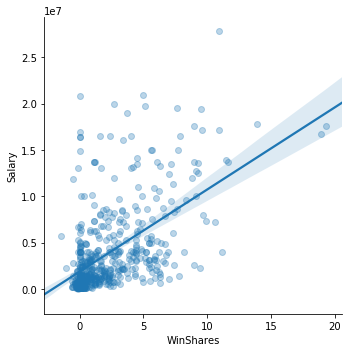

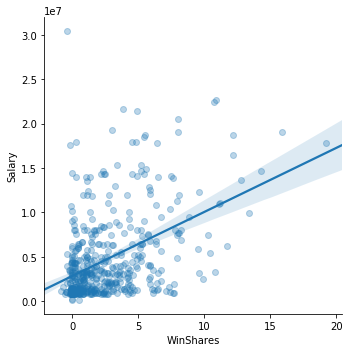

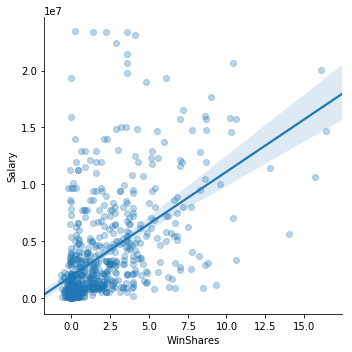

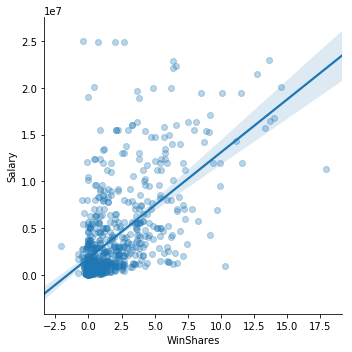

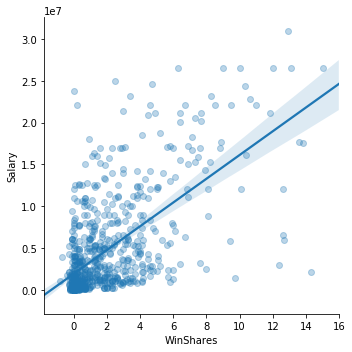

In [120]:
#lm plot by season:
for year in range(1991, 2018):
    sns.lmplot(data=data.loc[data.loc[:, 'Season_End'] == year, :], x='WinShares', y='Salary', scatter_kws={'alpha':0.3})